In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# logistic regression
from sklearn.linear_model import LogisticRegression

In [40]:
# read in data
df = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', None)
df.head()

C:\Users\Gian\AppData\Local\Temp\ipykernel_22900\4034987211.py:2: DtypeWarning: Columns (21,22,36,37,46,47,48,49,50,51,52,53,54,56,110,111,112,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,Maintenance Accident Number,Maintenance Accident Year,Maintenance Accident Month,Grade Crossing ID,Day,Date,Time,Accident Type,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Subdivision,Division Code,Division,Station,Milepost,State Abbreviation,State Name,County Name,District,Temperature,Visibility,Weather Condition,Track Type,Track Name,Track Class,Track Density,Train Direction,Equipment Type,Equipment Attended,Train Number,Train Speed,Recorded Estimated Speed,Maximum Speed,Gross Tonnage,Signalization,Method of Operation,Adjunct Code 1,Adjunct Code Name 1,Adjunct Code 2,Adjunct Code Name 2,Adjunct Code 3,Adjunct Code Name 3,Remote Control Locomotive,First Car Initials,First Car Number,First Car Position,First Car Loaded,Causing Car Initials,Causing Car Number,Causing Car Position,Causing Car Loaded,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Primary Accident Cause,Contributing Accident Cause,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Persons Killed For Reporting Railroad,Persons Injured For Reporting Railroad,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Special Study 1,Special Study 2,Latitude,Longitude,Narrative,Joint Track Type,Joint Track Class,Class,Joint CD,Incident Key,Report Key,Reporting Railroad Company Grouping,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Northern Indiana Commuter Transportation District,2017.0,N1700013,17.0,6.0,NaN,NaN,NaN,NaN,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,201707188,17.0,6.0,NaN,6.0,06/06/2017,2:14 PM,Derailment,0.0,0.0,0.0,149,SYSTEM,NaN,NaN,CHICAGO,.55,IL,ILLINOIS,COOK,4.0,65.0,Day,Clear,Yard,YARD LEAD,1,NaN,North,Commuter Train - Pulling,Yes,918,10.0,Estimated,10,0,Not Signaled,Other Than Main Track,NaN,NaN,NaN,NaN,NaN,NaN,Not a remotely controlled operation,NICD,000203,2.0,No,NaN,NaN,0.0,NaN,0.0,0.0,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,"98,627",0,"132,013",Switch point worn or broken,NaN,1.0,NaN,1.0,NaN,1.0,56.0,1.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,OTH,000-000-000,41.884035,-87.623003,TRAIN 918 (NICD WB TRAIN 18) DERAILED WHILE PA...,Yard,1,No,1.0,NIRC201707188201706,NICDN1700013201706,Passenger (Formerly Commuter),Class 3,SMT-4 - CP/CN/CCD,Northern Indiana Commuter Transportation District,Not Assigned,NaN,NaN,NaN,NaN,NaN,Passenger (Formerly Commuter),Class 3,SMT-4 - CP/CN/CCD,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,Not Assigned
1,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017.0,201707

In [41]:
# # creating a column with a 1 if there were any deaths in Total Persons Killed, 0 otherwise
# df['deaths'] = np.where(df['Total Persons Killed'] > 0, 1, 0)
# # make sure this is an int64 type
# df['deaths'] = df['deaths'].astype('int64')
# # Removing the columns that had deaths
# df = df.drop(['Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Persons Killed For Reporting Railroad', 'Persons Injured For Reporting Railroad', 'Total Persons Killed', 'Total Persons Injured', 'Total Killed Form 54', 'Total Injured Form 54'], axis=1)

In [42]:
# creating a column with a 1 if there were any deaths or injuries at all across all categories, 0 otherwise
c = ['Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Persons Killed For Reporting Railroad', 'Persons Injured For Reporting Railroad', 'Total Persons Killed', 'Total Persons Injured', 'Total Killed Form 54', 'Total Injured Form 54']
df['Casualty'] = np.where(df[c].sum(axis=1) > 0, 1, 0)
# make sure this is an int64 type
df['Casualty'] = df['Casualty'].astype('int64')
# removing all the columns that had deaths or injuries
df = df.drop(['Railroad Employees Killed', 'Railroad Employees Injured', 'Passengers Killed', 'Passengers Injured', 'Others Killed', 'Others Injured', 'Persons Killed For Reporting Railroad', 'Persons Injured For Reporting Railroad', 'Total Persons Killed', 'Total Persons Injured', 'Total Killed Form 54', 'Total Injured Form 54'], axis=1)


C:\Users\Gian\AppData\Local\Temp\ipykernel_22900\892954755.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Casualty'] = np.where(df[c].sum(axis=1) > 0, 1, 0)


In [43]:
# drop all non numeric columns
df = df.select_dtypes(include=['float64', 'int64'])
# print remaining columns
df.columns

Index(['Report Year', 'Accident Year', 'Accident Month', 'Other Accident Year',
       'Other Accident Month', 'Maintenance Accident Year',
       'Maintenance Accident Month', 'Day', 'Hazmat Cars',
       'Hazmat Cars Damaged', 'Hazmat Released Cars', 'District',
       'Temperature', 'Train Speed', 'Maximum Speed', 'First Car Position',
       'Causing Car Number', 'Causing Car Position', 'Positive Alcohol Tests',
       'Positive Drug Tests', 'Head End Locomotives',
       'Mid Train Manual Locomotives', 'Mid Train Remote Locomotives',
       'Rear End Manual Locomotives', 'Rear End Remote Locomotives',
       'Derailed Head End Locomotives',
       'Derailed Mid Train Manual Locomotives',
       'Derailed Mid Train Remote Locomotives',
       'Derailed Rear End Manual Locomotives',
       'Derailed Rear End Remote Locomotives', 'Loaded Freight Cars',
       'Loaded Passenger Cars', 'Empty Freight Cars', 'Empty Passenger Cars',
       'Cabooses', 'Derailed Loaded Freight Cars',
    

In [44]:
# find all rows that have na, order by most na to least
# drop all columns with more than 10000 na
na_counts = df.isna().sum()
cols_to_drop = na_counts[na_counts > 1000].index.tolist()

# drop columns with more than 1000 missing values
df.drop(cols_to_drop, axis=1, inplace=True)

# fill in the rest of the na with the mean of the column
df.fillna(df.mean(), inplace=True)

print(df.isna().sum().sort_values(ascending=False))

# find length of df
len(df)

Report Year                              0
Empty Passenger Cars                     0
Derailed Mid Train Remote Locomotives    0
Derailed Rear End Manual Locomotives     0
Derailed Rear End Remote Locomotives     0
Loaded Freight Cars                      0
Loaded Passenger Cars                    0
Empty Freight Cars                       0
Cabooses                                 0
Derailed Head End Locomotives            0
Derailed Loaded Freight Cars             0
Derailed Loaded Passenger Cars           0
Derailed Empty Freight Cars              0
Derailed Empty Passenger Cars            0
Derailed Cabooses                        0
Joint CD                                 0
Derailed Mid Train Manual Locomotives    0
Rear End Remote Locomotives              0
Accident Year                            0
Hazmat Released Cars                     0
Accident Month                           0
Maintenance Accident Year                0
Maintenance Accident Month               0
Day        

215849

In [45]:
# Fit a logisitc regression across all variables trying to predict whether or not a person died
log_reg = LogisticRegression(max_iter=10000)
# deaths = df['deaths']
casualty = df['Casualty']
# log_reg.fit(df.drop(['deaths'], axis=1), df['deaths'])
log_reg.fit(df.drop(['Casualty'], axis=1), df['Casualty'])

LogisticRegression(max_iter=10000)

<Axes: xlabel='feature'>

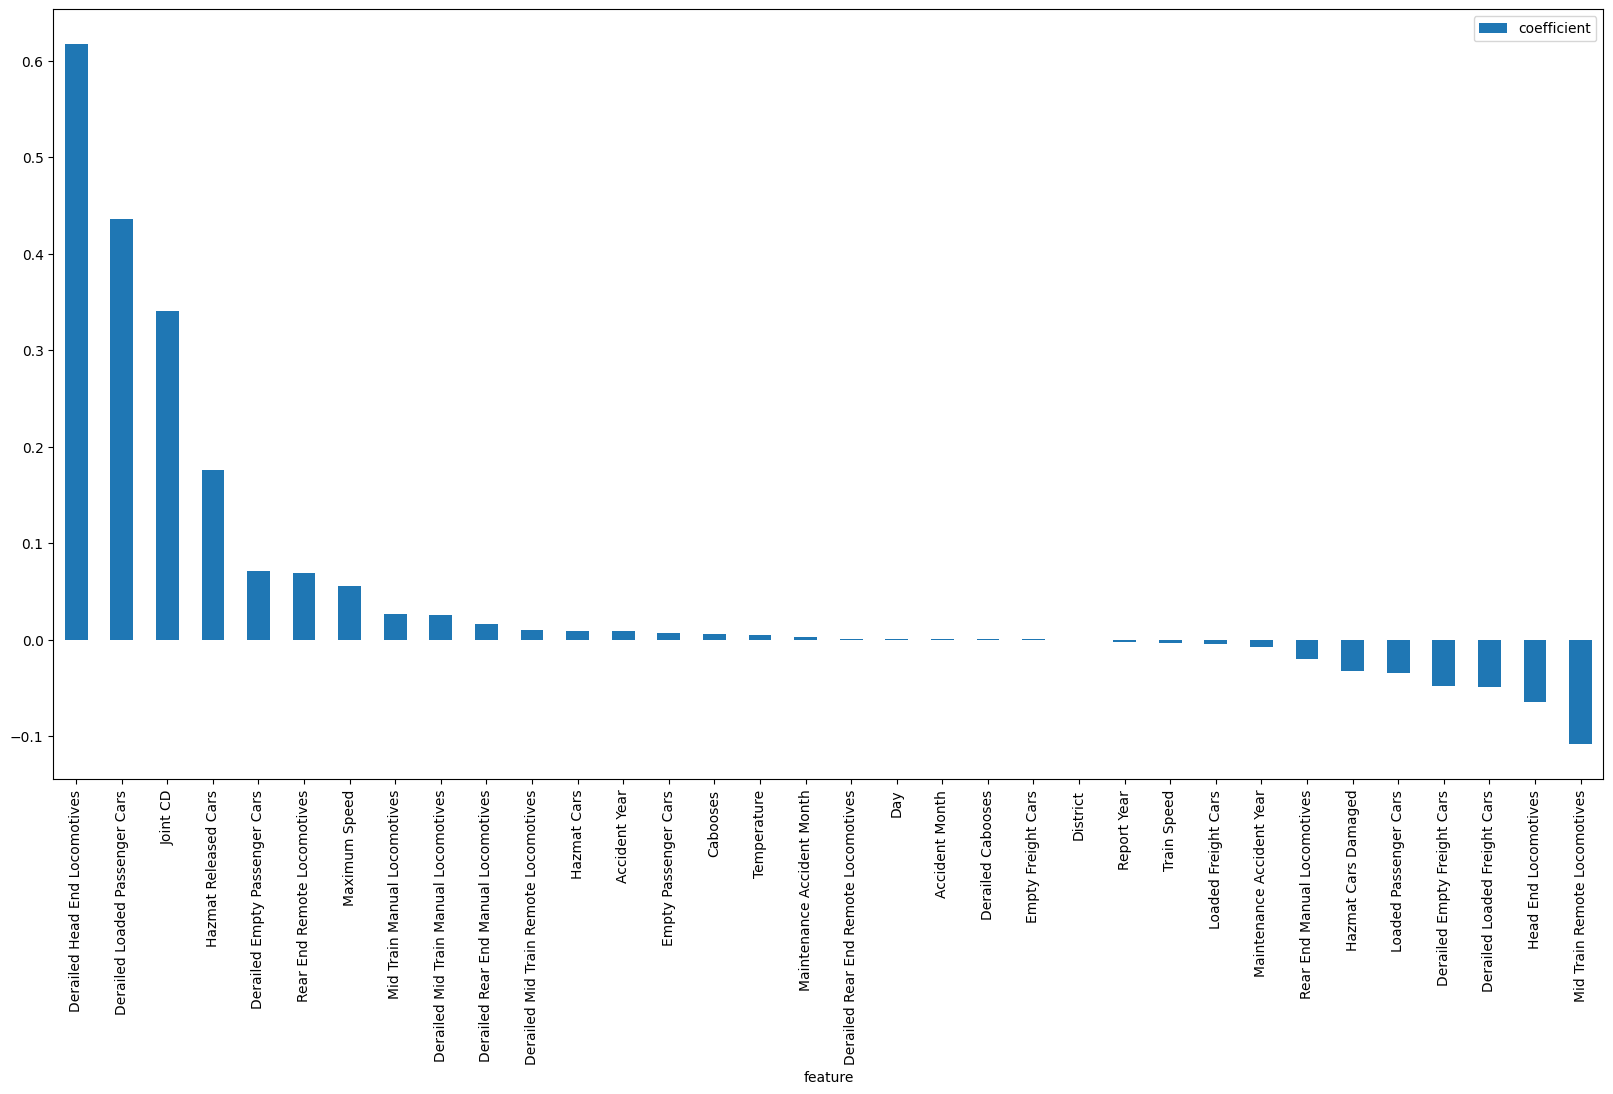

In [46]:
# match the coefficients to the column names
# coefficients = pd.DataFrame({'feature': df.drop(['deaths'], axis=1).columns, 'coefficient': log_reg.coef_[0]})
coefficients = pd.DataFrame({'feature': df.drop(['Casualty'], axis=1).columns, 'coefficient': log_reg.coef_[0]})
# order the coefficients from highest to lowest
coefficients.sort_values('coefficient', ascending=False)
coefficients.sort_values('coefficient', ascending=False).plot.bar(x='feature', y='coefficient', figsize=(20,10))

In [47]:
# get list of coefficients that had a large impact on the model
coefficients[abs(coefficients['coefficient']) > 0.01]
# this has to be absolute value because some coefficients are negative
impacts = coefficients[abs(coefficients['coefficient']) > 0.01]['feature'].tolist()

# keep only the columns that had a large impact on the model
df = df[impacts]
# add back in the deaths column
# df['deaths'] = deaths
df['Casualty'] = casualty

df.head()

,Hazmat Cars Damaged,Hazmat Released Cars,Maximum Speed,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Rear End Manual Locomotives,Loaded Passenger Cars,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Joint CD,Casualty
0,0.0,0.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,1.0,0
1,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0
3,0.0,0.0,4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0
4,1.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [48]:
# performing another logistic regression with only the columns that had a large impact on the model
log_reg = LogisticRegression(max_iter=10000)
# deaths = df['deaths']
casualty = df['Casualty']
# log_reg.fit(df.drop(['deaths'], axis=1), df['deaths'])
log_reg.fit(df.drop(['Casualty'], axis=1), df['Casualty'])

LogisticRegression(max_iter=10000)

<Axes: xlabel='feature'>

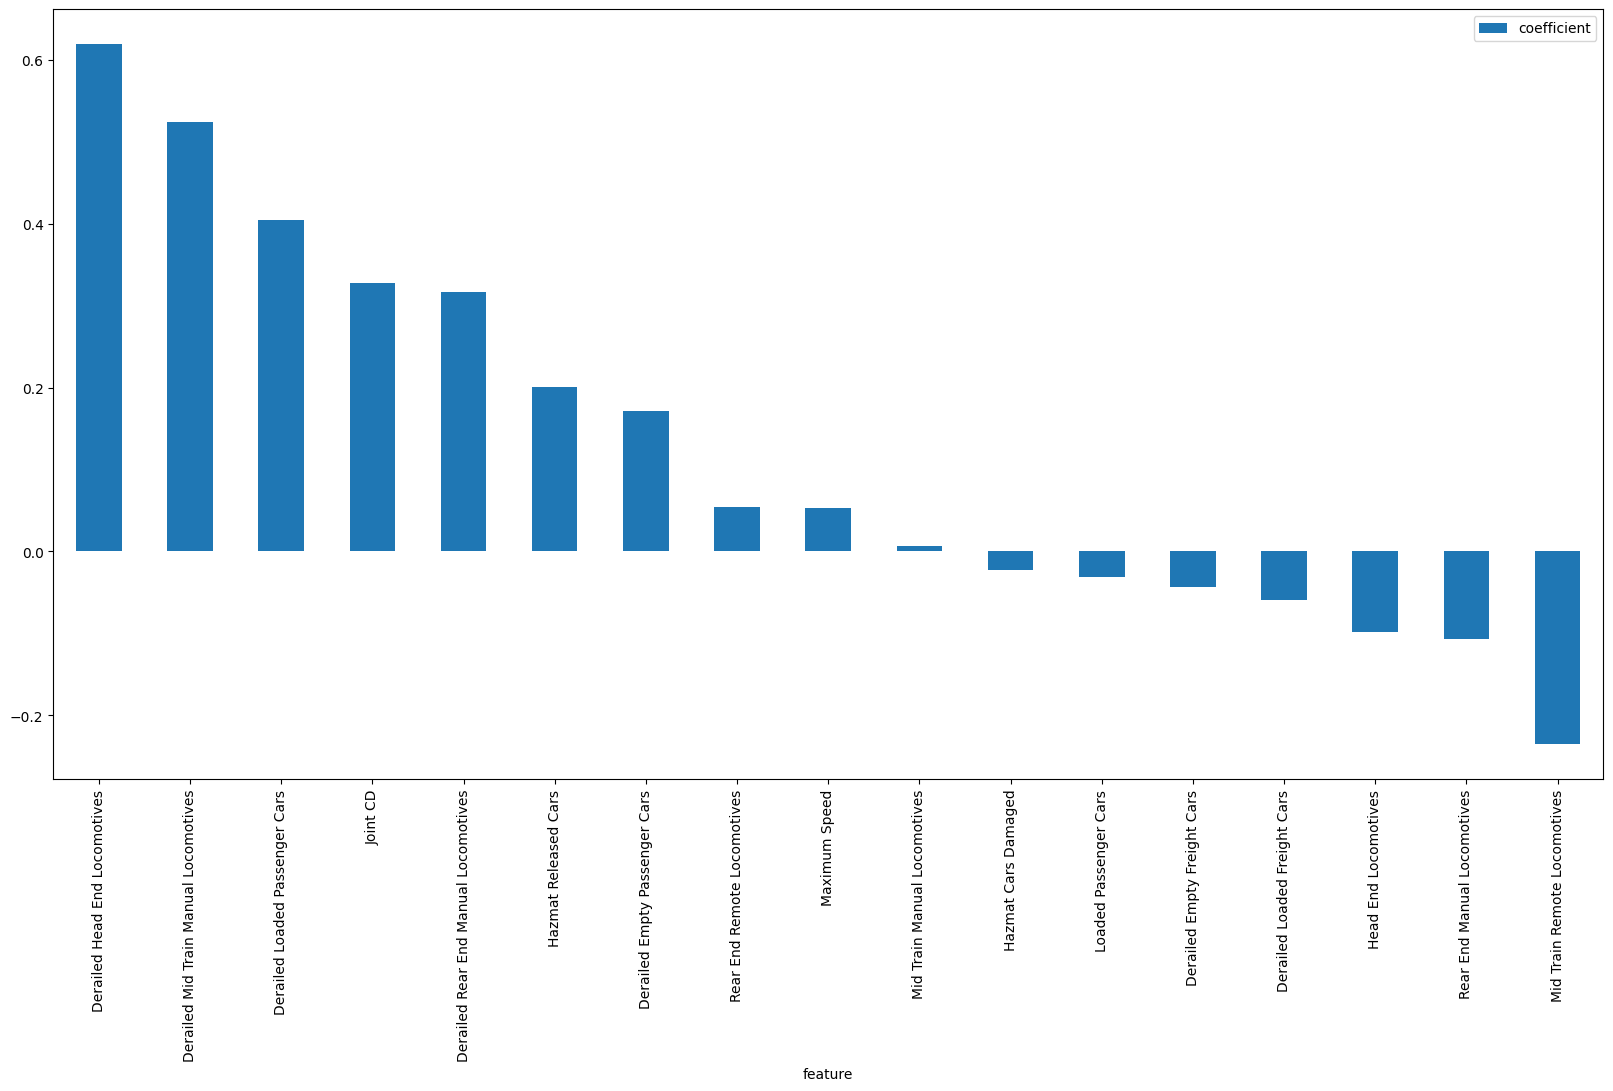

In [49]:
# match the coefficients to the column names
# coefficients = pd.DataFrame({'feature': df.drop(['deaths'], axis=1).columns, 'coefficient': log_reg.coef_[0]})
coefficients = pd.DataFrame({'feature': df.drop(['Casualty'], axis=1).columns, 'coefficient': log_reg.coef_[0]})
# order the coefficients from highest to lowest
coefficients.sort_values('coefficient', ascending=False)
coefficients.sort_values('coefficient', ascending=False).plot.bar(x='feature', y='coefficient', figsize=(20,10))

In [16]:
# find model accuracy
# log_reg.score(df.drop(['deaths'], axis=1), df['deaths'])
log_reg.score(df.drop(['Casualty'], axis=1), df['Casualty'])

0.9282044392144508

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

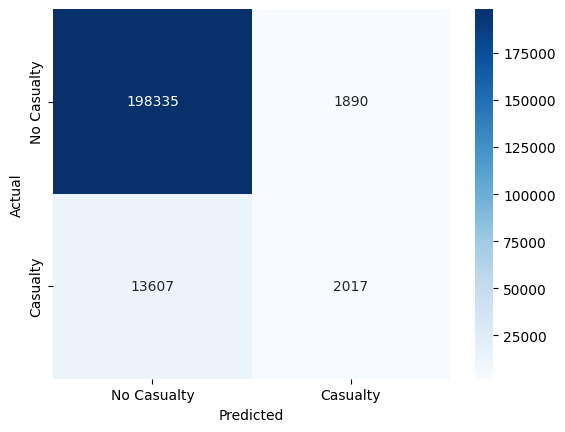

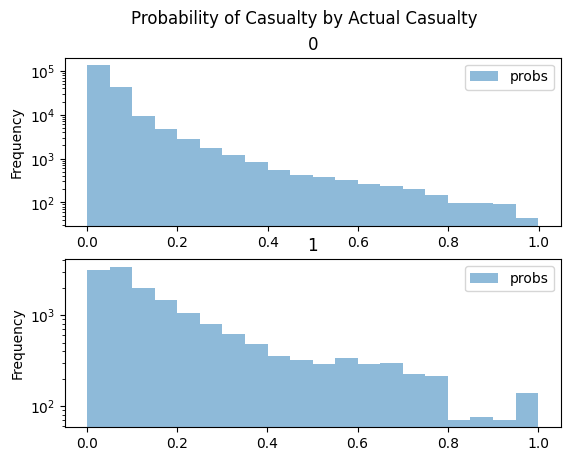

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix
# make it pretty
import seaborn as sns

# get predictions
# predictions = log_reg.predict(df.drop(['deaths'], axis=1))
predictions = log_reg.predict(df.drop(['Casualty'], axis=1))

# create confusion matrix
# confusion_matrix(df['deaths'], predictions)
confusion_matrix(df['Casualty'], predictions)

# plot confusion matrix and label the 0 and 1 with the correct labels and cmap = Blues
# sns.heatmap(confusion_matrix(df['deaths'], predictions), annot=True, cmap='Blues', fmt='g', xticklabels=['No Deaths', 'Deaths'], yticklabels=['No Deaths', 'Deaths'])
s_heatmap = sns.heatmap(confusion_matrix(df['Casualty'], predictions), annot=True, cmap='Blues', fmt='g', xticklabels=['No Casualty', 'Casualty'], yticklabels=['No Casualty', 'Casualty'])
# set predicted and actual labels
plt.xlabel('Predicted')
plt.ylabel('Actual')


# get the probabilities of each prediction
# probs = log_reg.predict_proba(df.drop(['deaths'], axis=1))
probs = log_reg.predict_proba(df.drop(['Casualty'], axis=1))

# get the probability of a death
probs = probs[:,1]

# create a dataframe with the probabilities and the actual deaths
# probs_df = pd.DataFrame({'probs': probs, 'deaths': df['deaths']})
probs_df = pd.DataFrame({'probs': probs, 'casualty': df['Casualty']})

# plot the probabilities hist
# probs_df.plot.hist(by='deaths', bins=20, alpha=0.5, xlabel='Probability of Death', ylabel='Frequency', title='Probability of Death by Actual Deaths', logy=True)
probs_df.plot.hist(by='casualty', bins=20, alpha=0.5, xlabel='Probability of Casualty', ylabel='Frequency', title='Probability of Casualty by Actual Casualty', logy=True)